Data Import

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ATom/ML_Pandas/_cafe_sales.csv')

In [ ]:
# Check how many missing values
print(df.isnull().sum())

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64


In [ ]:
# Quick dataset overview
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB
None


In [ ]:
# Descriptive stats (missing values will show as NaN)
print(df.describe())

       Transaction ID   Item Quantity Price Per Unit Total Spent  \
count           10000   9667     9862           9821        9827   
unique          10000     10        7              8          19   
top       TXN_9226047  Juice        5            3.0         6.0   
freq                1   1171     2013           2429         979   

        Payment Method  Location Transaction Date  
count             7421      6735             9841  
unique               5         4              367  
top     Digital Wallet  Takeaway          UNKNOWN  
freq              2291      3022              159  


In [ ]:
# Find empty rows in any column
empty_rows = df[df.isnull().any(axis=1)]
empty_rows


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31
13,TXN_9437049,Cookie,5,1.0,5.0,NaN,Takeaway,2023-06-01
14,TXN_8915701,ERROR,2,1.5,3.0,NaN,In-store,2023-03-21
...,...,...,...,...,...,...,...,...
9994,TXN_7851634,UNKNOWN,4,4.0,16.0,NaN,NaN,2023-01-08
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02


In [ ]:

df = df.dropna(subset=['Location'])
df = df.dropna(subset=['Item'])
df = df.dropna(subset=['Payment Method'])
# Verify the changes (check for missing values again)
print(df.isnull().sum())
print(df.info())


Transaction ID       0
Item                 0
Quantity            71
Price Per Unit      81
Total Spent         74
Payment Method       0
Location             0
Transaction Date    67
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 4833 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    4833 non-null   object
 1   Item              4833 non-null   object
 2   Quantity          4762 non-null   object
 3   Price Per Unit    4752 non-null   object
 4   Total Spent       4759 non-null   object
 5   Payment Method    4833 non-null   object
 6   Location          4833 non-null   object
 7   Transaction Date  4766 non-null   object
dtypes: object(8)
memory usage: 339.8+ KB
None


In [ ]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9984,TXN_3142496,Smoothie,UNKNOWN,4.0,4.0,Cash,Takeaway,2023-07-27
9986,TXN_2858441,Sandwich,2,4.0,8.0,Credit Card,In-store,2023-12-14
9991,TXN_3897619,Sandwich,3,4.0,12.0,Cash,Takeaway,2023-02-24
9992,TXN_2739140,Smoothie,4,4.0,16.0,UNKNOWN,In-store,2023-07-05


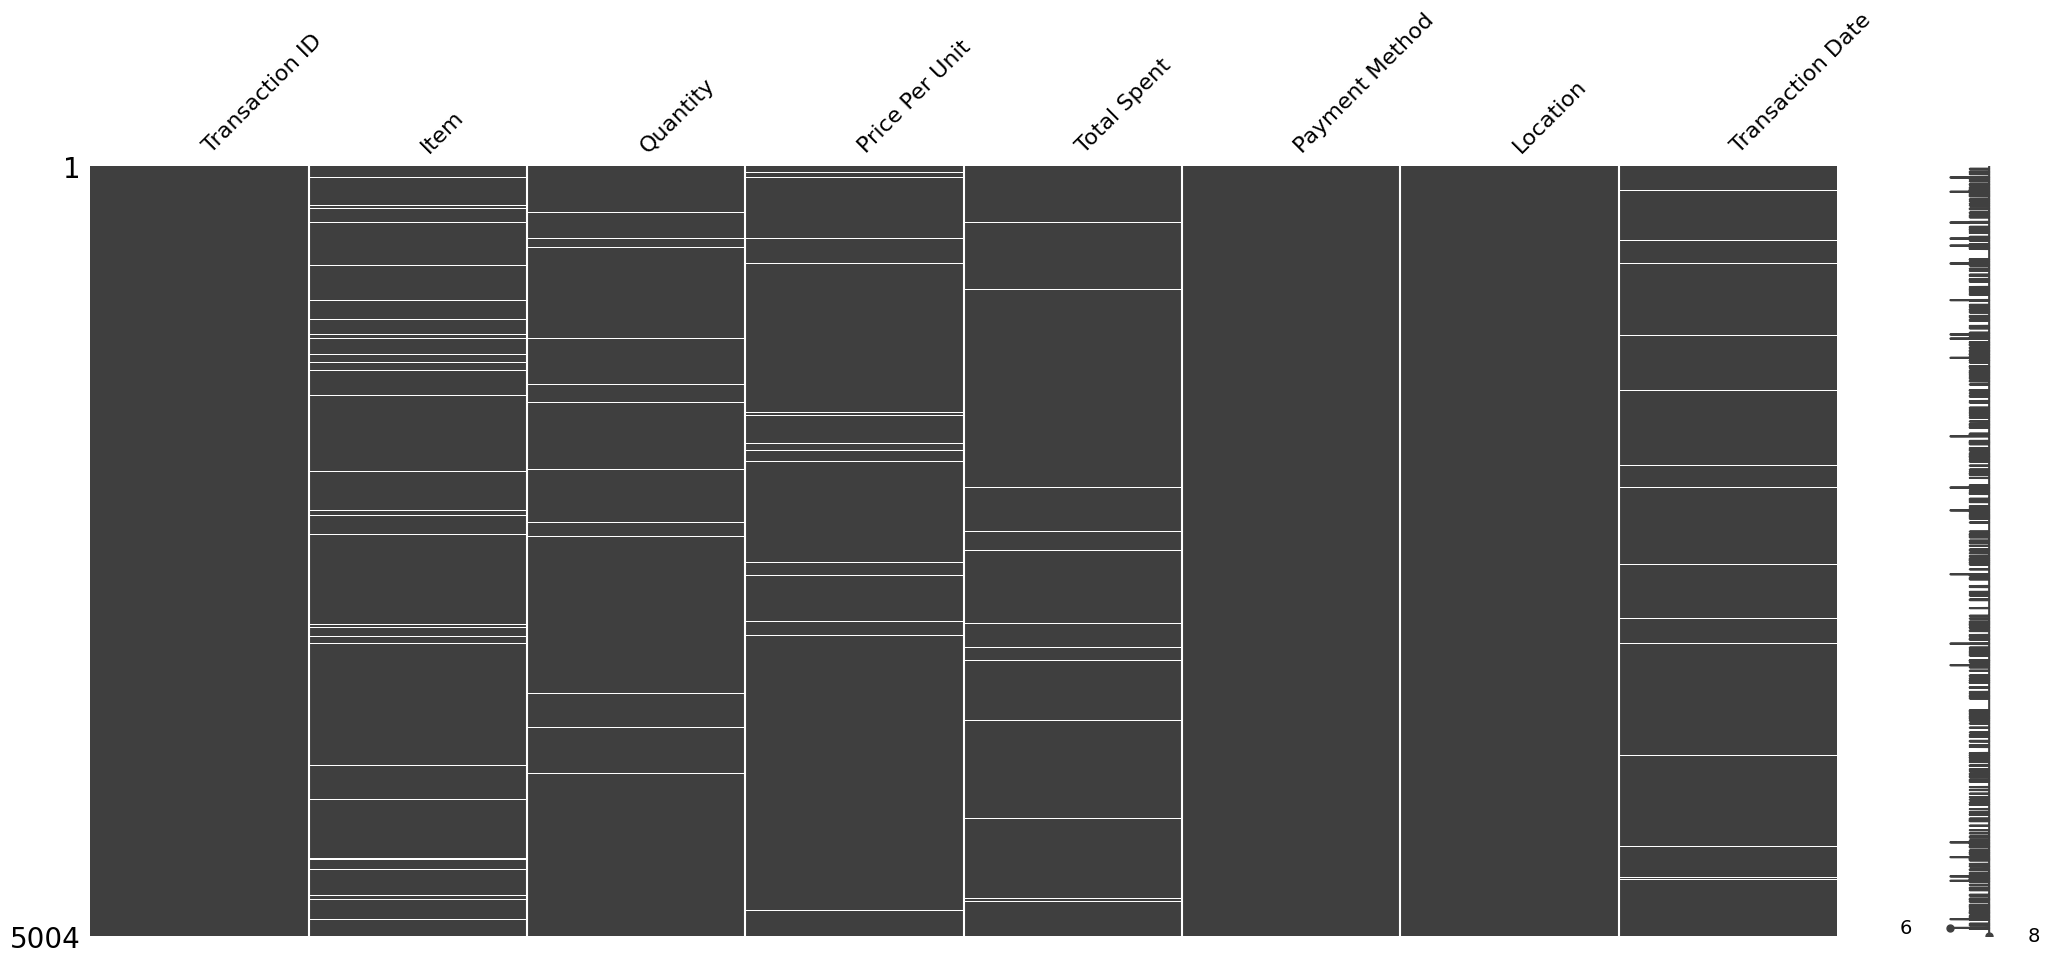

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
# Matrix plot
msno.matrix(df)
plt.show()


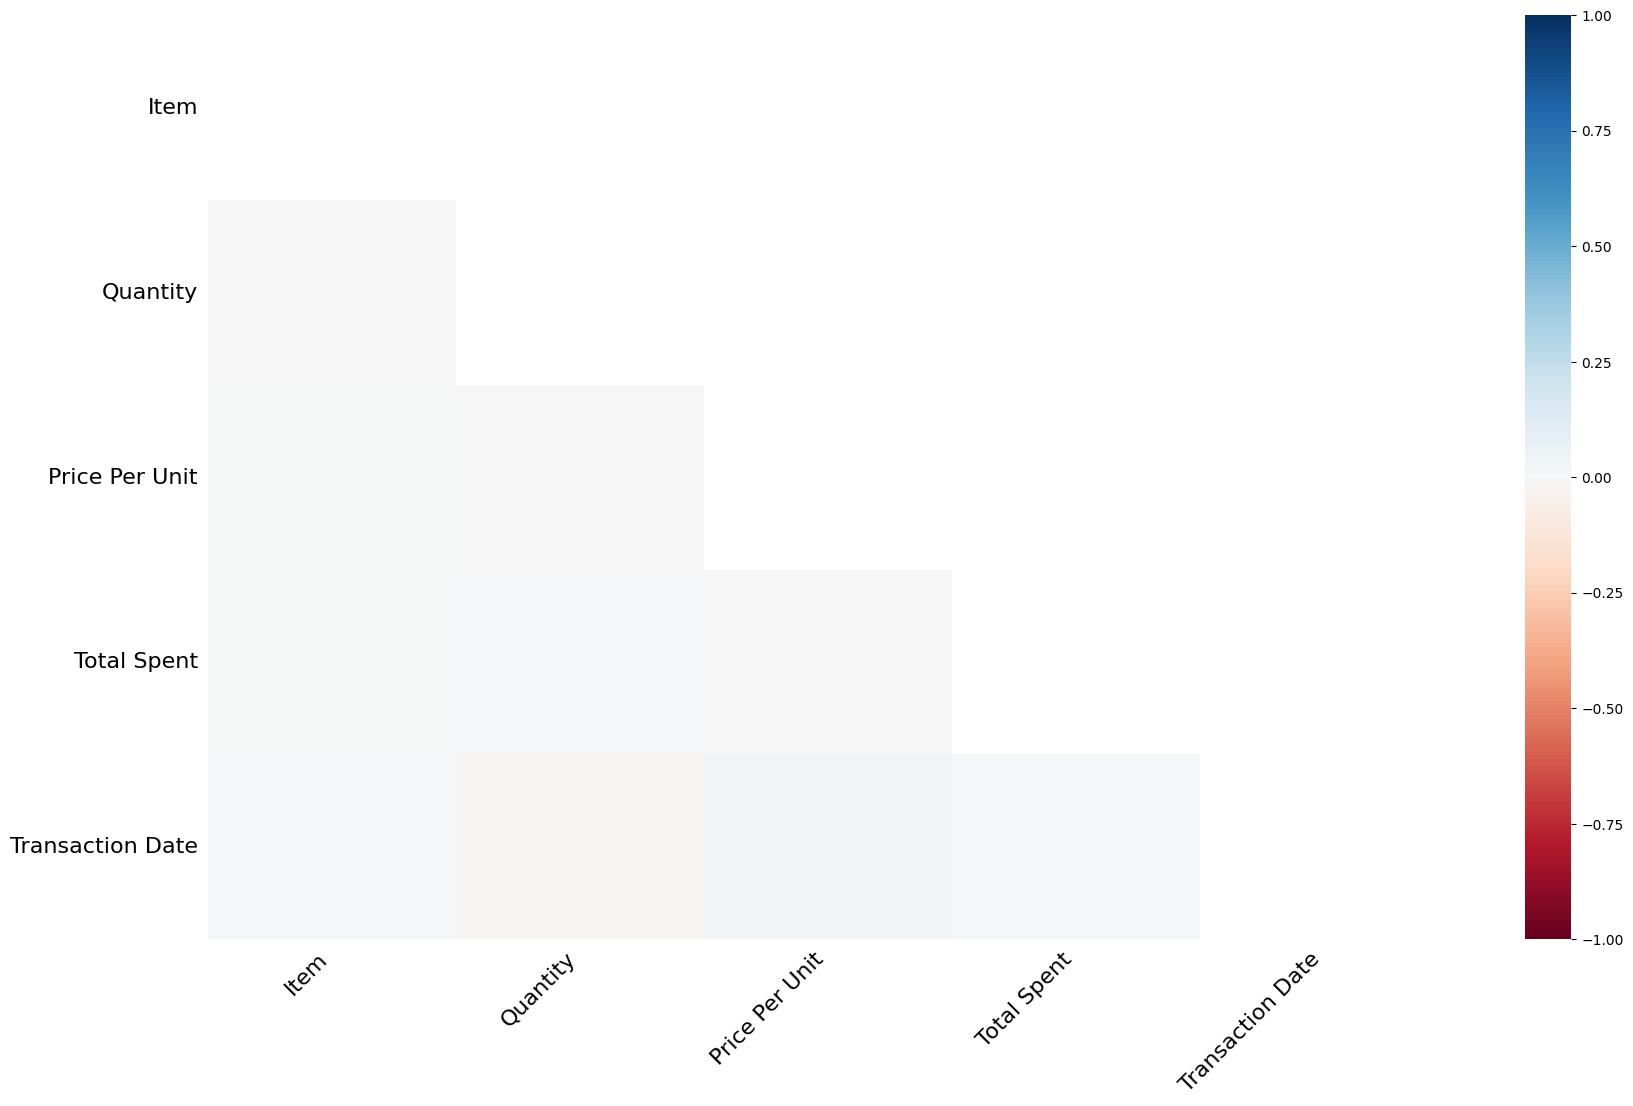

In [ ]:
# Heatmap
msno.heatmap(df)
plt.show()

In [ ]:
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mode()[0])

In [ ]:
print(df.isnull().sum())
print(df.info())

Transaction ID       0
Item                 0
Quantity             0
Price Per Unit      81
Total Spent         74
Payment Method       0
Location             0
Transaction Date    67
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 4833 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    4833 non-null   object
 1   Item              4833 non-null   object
 2   Quantity          4833 non-null   object
 3   Price Per Unit    4752 non-null   object
 4   Total Spent       4759 non-null   object
 5   Payment Method    4833 non-null   object
 6   Location          4833 non-null   object
 7   Transaction Date  4766 non-null   object
dtypes: object(8)
memory usage: 339.8+ KB
None


In [ ]:
print(df['Price Per Unit'].describe())

count    4833.000000
mean        2.957169
std         1.261424
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Price Per Unit, dtype: float64


In [ ]:
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
print(df['Price Per Unit'].isnull().sum())
df

253


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9984,TXN_3142496,Smoothie,UNKNOWN,4.0,4.0,Cash,Takeaway,2023-07-27
9986,TXN_2858441,Sandwich,2,4.0,8.0,Credit Card,In-store,2023-12-14
9991,TXN_3897619,Sandwich,3,4.0,12.0,Cash,Takeaway,2023-02-24
9992,TXN_2739140,Smoothie,4,4.0,16.0,UNKNOWN,In-store,2023-07-05


In [ ]:
df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Price Per Unit'].mode()[0])
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9984,TXN_3142496,Smoothie,UNKNOWN,4.0,4.0,Cash,Takeaway,2023-07-27
9986,TXN_2858441,Sandwich,2,4.0,8.0,Credit Card,In-store,2023-12-14
9991,TXN_3897619,Sandwich,3,4.0,12.0,Cash,Takeaway,2023-02-24
9992,TXN_2739140,Smoothie,4,4.0,16.0,UNKNOWN,In-store,2023-07-05


In [ ]:
df = df.dropna(subset=['Total Spent'])
print(df.isnull().sum())
print(df.info())

Transaction ID       0
Item                 0
Quantity             0
Price Per Unit       0
Total Spent          0
Payment Method       0
Location             0
Transaction Date    65
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 4759 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    4759 non-null   object 
 1   Item              4759 non-null   object 
 2   Quantity          4759 non-null   object 
 3   Price Per Unit    4759 non-null   float64
 4   Total Spent       4759 non-null   object 
 5   Payment Method    4759 non-null   object 
 6   Location          4759 non-null   object 
 7   Transaction Date  4694 non-null   object 
dtypes: float64(1), object(7)
memory usage: 334.6+ KB
None


In [ ]:
df.to_csv('data.csv', index=False)

In [ ]:
df = pd.read_csv("/content/data.csv")
#df = df.dropna(subset=['Transaction Date'])
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
4754,TXN_3142496,Smoothie,UNKNOWN,4.0,4.0,Cash,Takeaway,2023-07-27
4755,TXN_2858441,Sandwich,2,4.0,8.0,Credit Card,In-store,2023-12-14
4756,TXN_3897619,Sandwich,3,4.0,12.0,Cash,Takeaway,2023-02-24
4757,TXN_2739140,Smoothie,4,4.0,16.0,UNKNOWN,In-store,2023-07-05


In [ ]:
# prompt: did this with all column df = df[~df['Transaction Date'].isin(['unknown', 'error'])]
# df

df = df[~df['Transaction Date'].isin(['UNKNOWN', 'ERROR'])]
df
df = df[~df['Location'].isin(['UNKNOWN', 'ERROR'])]
df
df = df[~df['Item'].isin(['UNKNOWN', 'ERROR'])]
df = df[~df['Quantity'].isin(['UNKNOWN', 'ERROR'])]
df = df[~df['Quantity'].isin(['UNKNOWN', 'ERROR'])]
df = df[~df['Payment Method'].isin(['UNKNOWN', 'ERROR'])]
df = df[~df['Price Per Unit'].isin(['UNKNOWN', 'ERROR'])]
df = df[~df['Total Spent'].isin(['UNKNOWN', 'ERROR'])]
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
7,TXN_2548360,Salad,5,5.0,25.0,Cash,Takeaway,2023-11-07
9,TXN_7619095,Sandwich,2,4.0,8.0,Cash,In-store,2023-05-03
...,...,...,...,...,...,...,...,...
4751,TXN_9668108,Cake,1,3.0,3.0,Cash,In-store,2023-01-20
4753,TXN_9933628,Smoothie,5,4.0,20.0,Cash,In-store,2023-07-20
4755,TXN_2858441,Sandwich,2,4.0,8.0,Credit Card,In-store,2023-12-14
4756,TXN_3897619,Sandwich,3,4.0,12.0,Cash,Takeaway,2023-02-24


In [ ]:
df = df.dropna()
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
7,TXN_2548360,Salad,5,5.0,25.0,Cash,Takeaway,2023-11-07
9,TXN_7619095,Sandwich,2,4.0,8.0,Cash,In-store,2023-05-03
...,...,...,...,...,...,...,...,...
4751,TXN_9668108,Cake,1,3.0,3.0,Cash,In-store,2023-01-20
4753,TXN_9933628,Smoothie,5,4.0,20.0,Cash,In-store,2023-07-20
4755,TXN_2858441,Sandwich,2,4.0,8.0,Credit Card,In-store,2023-12-14
4756,TXN_3897619,Sandwich,3,4.0,12.0,Cash,Takeaway,2023-02-24


In [ ]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])


<ipython-input-58-1be8a64c944f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])


In [ ]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
7,TXN_2548360,Salad,5,5.0,25.0,Cash,Takeaway,2023-11-07
9,TXN_7619095,Sandwich,2,4.0,8.0,Cash,In-store,2023-05-03
...,...,...,...,...,...,...,...,...
4751,TXN_9668108,Cake,1,3.0,3.0,Cash,In-store,2023-01-20
4753,TXN_9933628,Smoothie,5,4.0,20.0,Cash,In-store,2023-07-20
4755,TXN_2858441,Sandwich,2,4.0,8.0,Credit Card,In-store,2023-12-14
4756,TXN_3897619,Sandwich,3,4.0,12.0,Cash,Takeaway,2023-02-24


In [ ]:


# Convert 'Total Spent' to numeric, handling errors by coercing to NaN
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

# Fill NaN values with 0 if necessary before converting to int
# df['Total Spent'] = df['Total Spent'].fillna(0) # Uncomment if NaN values exist

# Convert to integers after ensuring numeric type and potential NaN handling
df['Total Spent'] = df['Total Spent'].astype(int)

<ipython-input-64-bbeb3fac9b10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')
<ipython-input-64-bbeb3fac9b10>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Spent'] = df['Total Spent'].astype(int)


In [ ]:

# Calculate unique values and info in 'Quantity' column
unique_quantities = df['Quantity'].unique()
quantity_counts = df['Quantity'].value_counts()

print("Unique Quantities:", unique_quantities)
print("\nQuantity Counts:\n", quantity_counts)


Unique Quantities: ['2' '4' '5' '3' '1']

Quantity Counts:
 Quantity
5    734
2    670
4    664
1    627
3    621
Name: count, dtype: int64


In [ ]:
# Calculate IQR for 'Quantity'
Q1_quantity = df['Quantity'].quantile(0.25)
Q3_quantity = df['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

# Create 'quantity_iqr_outlier' column
df['quantity_iqr_outlier'] = (df['Quantity'] < (Q1_quantity - 1.5 * IQR_quantity)) | (df['Quantity'] > (Q3_quantity + 1.5 * IQR_quantity))

# Now you can proceed with your outlier detection
outliers = df[(df['total spent_iqr_outlier']) | (df['quantity_iqr_outlier'])]

print(outliers[['Total Spent', 'Quantity', 'total spent_iqr_outlier', 'quantity_iqr_outlier']])

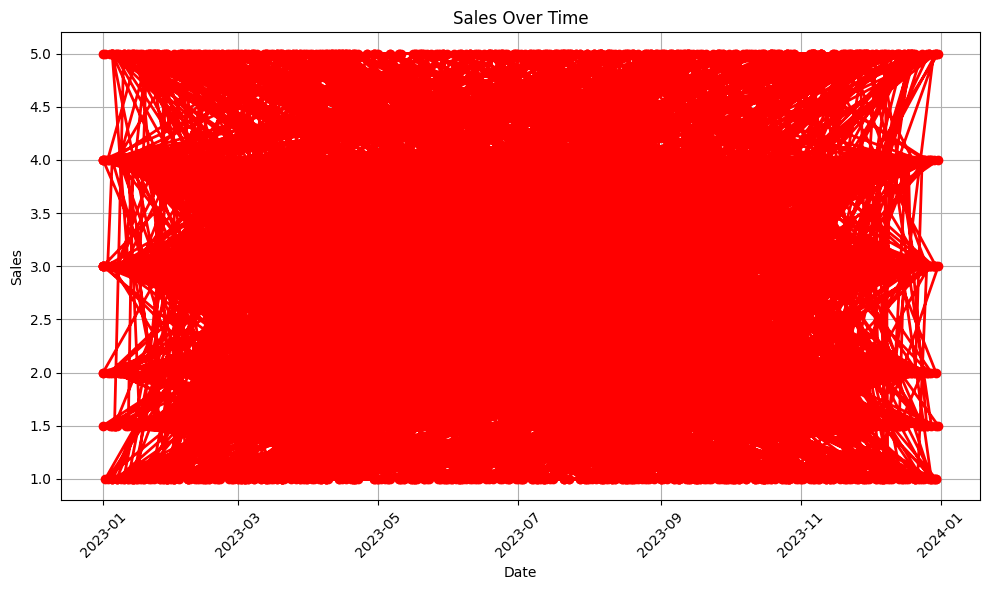

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(df['Transaction Date'], df['Price Per Unit'], marker='o', color='r', linestyle='-', linewidth=2)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
